In [62]:

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

source https://www.kaggle.com/datasets/qualidea1217/valorant-pro-matches-since-april-2021/

name: str
team: str  # might be different for the same team
agent: str
rating: float https://www.vlr.gg/160667/vlr-gg-player-rating-explained
acs: int  # average combat score
k: int  # kills
d: int  # deaths
a: int  # assists
tkmd: int  # total kills minus deaths
kast: float  # kill, assist, survive, trade %
adr: int  # average damage per round
hs: float  # headshot %
fk: int  # first kills
fd: int  # first deaths
fkmd: int  # first kills minus first deaths
t # attack side
ct # defend side

# fix corrupt data

manually edited ACS values over 1,000

In [63]:
%%perl -eat # skip cell

df = pd.read_csv('./data.csv', header=0, index_col=[0], encoding='latin-1')
df['team2-score'] = df['team2-score'].apply(pd.to_numeric, errors='coerce')
df = df[df['team2-score'].notnull()]
print(df.head())

df.to_csv('./data_cleaned.csv')

Couldn't find program: 'perl'


# check data

In [64]:
df = pd.read_csv('./data_cleaned.csv', header=0, index_col=[0], encoding='latin-1')
df.shape

(249460, 46)

In [65]:
df.head(10)

,match-datetime,patch,map,team1,team2,team1-score,team2-score,player-name,player-team,agent,...,hs-ct,fk,fk-t,fk-ct,fd,fd-t,fd-ct,fkmd,fkmd-t,fkmd-ct
0,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,HolyM0Ly,Impulse GW,Killjoy,...,0.26,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Dolfo,Impulse GW,Breach,...,0.38,0.0,0.0,0.0,1.0,1.0,0.0,-1.0,-1.0,0.0
2,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,zePiCzz,Impulse GW,Astra,...,0.27,2.0,2.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
3,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,s2newb,Impulse GW,Neon,...,0.24,7.0,3.0,4.0,5.0,5.0,0.0,2.0,-2.0,4.0
4,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Minikid,Impulse GW,Sova,...,0.80,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,-1.0
5,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Phatt,EGN Esports,Breach,...,0.28,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
6,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,Dext,EGN Esports,Cypher,...,0.52,3.0,0.0,3.0,3.0,2.0,1.0,0.0,-2.0,2.0
7,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,fainz,EGN Esports,Jett,...,0.43,3.0,2.0,1.0,4.0,2.0,2.0,-1.0,0.0,-1.0
8,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,al1en,EGN Esports,Omen,...,0.19,1.0,0.0,1.0,3.0,1.0,2.0,-2.0,-1.0,-1.0
9,2023/4/16 10:00,6.06,Haven,Impulse GW,EGN Esports,13,6.0,silenttt,EGN Esports,Sova,...,0.22,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [66]:
df.columns

Index(['match-datetime', 'patch', 'map', 'team1', 'team2', 'team1-score',
       'team2-score', 'player-name', 'player-team', 'agent', 'rating',
       'rating-t', 'rating-ct', 'acs', 'acs-t', 'acs-ct', 'k', 'k-t', 'k-ct',
       'd', 'd-t', 'd-ct', 'a', 'a-t', 'a-ct', 'tkmd', 'tkmd-t', 'tkmd-ct',
       'kast', 'kast-t', 'kast-ct', 'adr', 'adr-t', 'adr-ct', 'hs', 'hs-t',
       'hs-ct', 'fk', 'fk-t', 'fk-ct', 'fd', 'fd-t', 'fd-ct', 'fkmd', 'fkmd-t',
       'fkmd-ct'],
      dtype='object')

# preprocessing

In [67]:
df = pd.read_csv('./data_cleaned.csv', header=0, index_col=[0], encoding='latin-1')
df = df.dropna()
df.shape

(245144, 46)

record wins

In [68]:
df['win'] = ((df['player-team'] == df['team1']) & (df['team1-score'] > df['team2-score'])) | ((df['player-team'] == df['team2']) & (df['team2-score'] > df['team1-score']))
df.sample(10).sort_index()

,match-datetime,patch,map,team1,team2,team1-score,team2-score,player-name,player-team,agent,...,fk,fk-t,fk-ct,fd,fd-t,fd-ct,fkmd,fkmd-t,fkmd-ct,win
14967,2023/3/11 20:30,6.03,Ascent,FUSION,19esports,13,8.0,Maka,19esports,Sova,...,1.0,0.0,1.0,2.0,0.0,2.0,-1.0,0.0,-1.0,False
25855,2023/2/11 21:15,6.02,Ascent,Neema's Money Crew,Ambrosia,13,7.0,ROOMPA,Ambrosia,Sova,...,0.0,0.0,0.0,3.0,1.0,2.0,-3.0,-1.0,-2.0,False
46244,2022/12/11 16:00,5.10,Pearl,Northwood University,Carleton Ravens,4,13.0,dip,Northwood University,Neon,...,2.0,1.0,1.0,7.0,3.0,4.0,-5.0,-2.0,-3.0,False
93784,2022/5/24 3:00,4.09,Split,Tartarus,CNJ esports,13,8.0,GwangUh,Tartarus,Breach,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
110895,2022/4/29 4:30,4.07,Fracture,Catgirls,HONEY BADGERS,13,6.0,JELLYD,HONEY BADGERS,Kayo,...,2.0,2.0,0.0,1.0,0.0,1.0,1.0,2.0,-1.0,False
124833,2022/3/15 17:00,4.04,Haven,100 Thieves,SoaR,10,13.0,Ethan,100 Thieves,Chamber,...,2.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,False
151432,2022/1/16 17:00,4.00,Ascent,Zero MarksMen Black,Bait Academy,14,16.0,shonk,Zero MarksMen Black,Kayo,...,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,False
156167,2022/1/11 12:00,3.12,Bind,Kafalar eSports,Eternal Fire,11,13.0,DESTRUCT1VEE,Eternal Fire,Viper,...,2.0,0.0,2.0,3.0,3.0,0.0,-1.0,-3.0,2.0,True
189742,2021/9/27 19:55,3.06,Bind,TSM Academy,Renegades,13,6.0,payen,TSM Academy,Viper,...,2.0,1.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,True
245397,2021/4/25 5:00,2.07,Bind,CBT Gaming,KPC Computer Studio,13,6.0,W1nner,KPC Computer Studio,Cypher,...,0.0,0.0,0.0,3.0,1.0,2.0,-3.0,-1.0,-2.0,False


isolate feature set

In [69]:
feature_set = ['patch', 'map', 'player-name', 'agent', 'rating-t', 'rating-ct', 'acs-t', 'acs-ct', 'k-t', 'k-ct',
       'd-t', 'd-ct', 'a-t', 'a-ct', 'tkmd-t', 'tkmd-ct', 'kast-t', 'kast-ct', 'adr', 'adr-t', 'adr-ct', 'hs', 'fk-t', 'fk-ct', 'fd-t', 'fd-ct', 'fkmd-t', 'fkmd-ct']

df = df[feature_set + ['win']]
df.head()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct,win
0,6.06,Haven,HolyM0Ly,Killjoy,1.21,1.51,239.0,316.0,11.0,9.0,...,141.0,193.0,0.31,0.0,1.0,0.0,1.0,0.0,0.0,True
1,6.06,Haven,Dolfo,Breach,1.21,1.24,256.0,212.0,12.0,4.0,...,183.0,115.0,0.41,0.0,0.0,1.0,0.0,-1.0,0.0,True
2,6.06,Haven,zePiCzz,Astra,1.14,1.13,243.0,133.0,9.0,3.0,...,168.0,114.0,0.33,2.0,0.0,1.0,0.0,1.0,0.0,True
3,6.06,Haven,s2newb,Neon,0.35,2.29,174.0,428.0,8.0,10.0,...,107.0,244.0,0.27,3.0,4.0,5.0,0.0,-2.0,4.0,True
4,6.06,Haven,Minikid,Sova,0.51,1.31,95.0,124.0,4.0,4.0,...,56.0,77.0,0.39,0.0,0.0,0.0,1.0,0.0,-1.0,True


encode categorical variables

In [70]:
from sklearn.preprocessing import LabelEncoder

for col in ['map', 'player-name', 'agent']:
    le = LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
df.sample(10).sort_index()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct,win
140620,4.01,5,4155,18,1.71,1.84,252.0,317.0,5.0,15.0,...,206.0,261.0,0.33,0.0,1.0,1.0,2.0,-1.0,-1.0,True
159705,3.12,4,2165,8,1.06,1.22,239.0,230.0,11.0,6.0,...,133.0,168.0,0.31,3.0,3.0,1.0,2.0,2.0,1.0,False
165002,3.10,4,8817,9,0.96,1.15,224.0,206.0,10.0,11.0,...,145.0,149.0,0.29,1.0,1.0,1.0,0.0,0.0,1.0,True
174267,3.09,5,5542,8,0.63,0.34,130.0,132.0,1.0,4.0,...,68.0,90.0,0.33,0.0,1.0,1.0,1.0,-1.0,0.0,False
174866,3.09,1,3529,0,0.50,1.37,121.0,204.0,4.0,9.0,...,82.0,158.0,0.28,0.0,1.0,1.0,1.0,-1.0,0.0,True
188881,3.06,5,6672,18,1.36,1.36,240.0,242.0,10.0,11.0,...,154.0,170.0,0.24,0.0,0.0,0.0,0.0,0.0,0.0,True
200083,3.03,5,478,19,0.83,0.83,204.0,177.0,8.0,8.0,...,124.0,123.0,0.17,1.0,1.0,1.0,1.0,0.0,0.0,True
208866,3.02,8,1490,4,1.26,0.73,263.0,229.0,12.0,5.0,...,145.0,155.0,0.28,1.0,0.0,1.0,3.0,0.0,-3.0,True
215152,3.01,0,2798,12,0.66,1.07,91.0,237.0,4.0,13.0,...,53.0,121.0,0.14,0.0,2.0,2.0,0.0,-2.0,2.0,False
229625,2.09,0,3893,15,1.78,0.62,452.0,190.0,19.0,5.0,...,255.0,99.0,0.22,4.0,0.0,3.0,0.0,1.0,0.0,False


correlation

In [71]:
df.corr()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct,win
patch,1.000000,0.097374,-0.005635,-0.118753,0.020148,0.011683,0.001824,-0.009005,0.004464,-0.004644,...,0.039420,0.027875,0.083004,0.000993,0.002477,0.003334,0.001786,-0.001927,0.000757,-0.000512
map,0.097374,1.000000,0.001144,-0.001165,0.012768,-0.016383,0.020155,0.000673,0.022687,0.001798,...,0.023677,0.002460,-0.005845,0.008344,-0.003054,-0.002888,0.009216,0.008568,-0.008560,0.000109
player-name,-0.005635,0.001144,1.000000,0.002078,0.011412,0.017919,0.013856,0.014233,0.011648,0.017286,...,0.011846,0.012766,0.012915,0.014662,0.010788,0.006869,-0.000208,0.005485,0.008628,0.017852
agent,-0.118753,-0.001165,0.002078,1.000000,0.003881,-0.006470,-0.001339,0.011901,-0.015290,-0.021243,...,0.006707,0.032555,-0.037071,-0.034159,-0.059234,-0.019424,-0.007313,-0.010039,-0.041729,0.004766
rating-t,0.020148,0.012768,0.011412,0.003881,1.000000,0.186292,0.820977,0.114139,0.649609,0.081372,...,0.787159,0.108756,0.125341,0.279971,0.047333,-0.298669,-0.044112,0.449150,0.066716,0.428245
rating-ct,0.011683,-0.016383,0.017919,-0.006470,0.186292,1.000000,0.140257,0.818931,0.096027,0.662942,...,0.135306,0.780803,0.091256,0.074179,0.326768,-0.010999,-0.293943,0.064411,0.453507,0.429717
acs-t,0.001824,0.020155,0.013856,-0.001339,0.820977,0.140257,1.000000,0.144315,0.749280,0.111011,...,0.938356,0.136980,0.120447,0.417218,0.129953,-0.141960,0.031435,0.426459,0.081267,0.247331
acs-ct,-0.009005,0.000673,0.014233,0.011901,0.114139,0.818931,0.144315,1.000000,0.101867,0.741040,...,0.140553,0.932982,0.088083,0.129773,0.431306,0.069532,-0.180929,0.041556,0.460277,0.226822
k-t,0.004464,0.022687,0.011648,-0.015290,0.649609,0.096027,0.749280,0.101867,1.000000,-0.007690,...,0.756393,0.075101,0.138799,0.473763,0.049951,0.004369,0.001616,0.351596,0.038229,0.222874
k-ct,-0.004644,0.001798,0.017286,-0.021243,0.081372,0.662942,0.111011,0.741040,-0.007690,1.000000,...,0.085104,0.740415,0.085025,0.059638,0.509420,0.035343,-0.027252,0.016382,0.419090,0.209595


<Axes: >

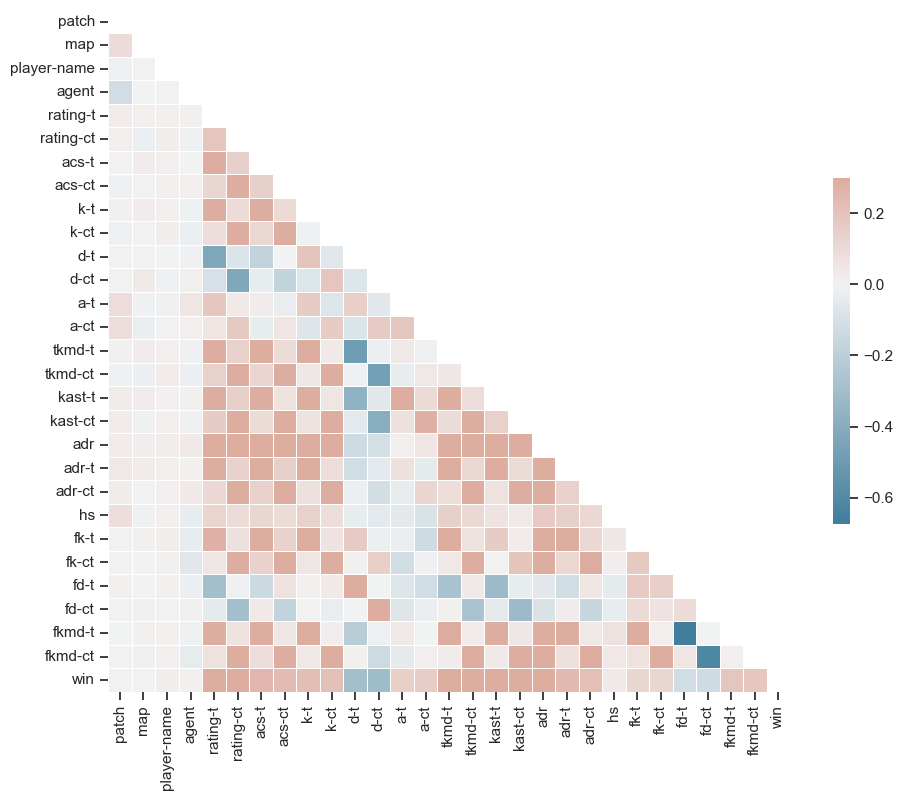

In [72]:
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [73]:
%%perl -eat # skip cell

sns.pairplot(df[feature_set])

Couldn't find program: 'perl'


In [74]:
%%perl -eat # skip cell

f, ax = plt.subplots(figsize=(12, 10))
ax.set_xscale("log")

sns.set_theme(style="ticks")
sns.boxplot(df[feature_set], x='acs-ct', y='map', hue='map')

Couldn't find program: 'perl'


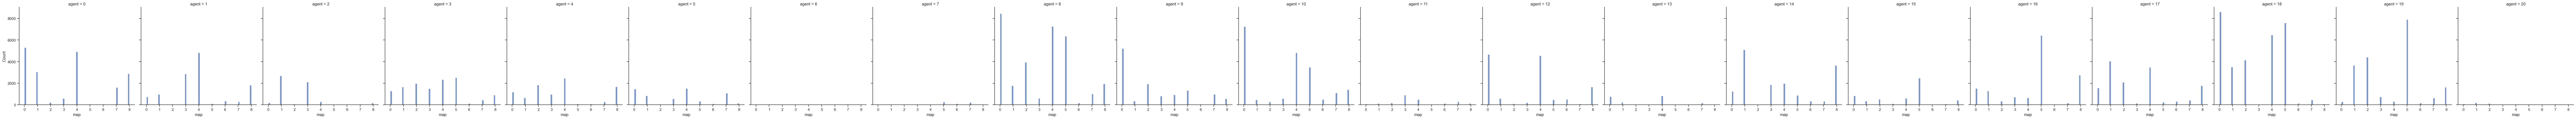

In [75]:
sns.displot(df[['agent', 'map']], x='map', col='agent', facet_kws=dict(margin_titles=True))

# model

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
xdf = df.drop('win', axis=1)
scaler.fit(xdf)
X = pd.DataFrame(data=scaler.transform(xdf), columns=xdf.columns)
y = df['win']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
n = len(X.columns)

models = {}
X.head()

,patch,map,player-name,agent,rating-t,rating-ct,acs-t,acs-ct,k-t,k-ct,...,adr,adr-t,adr-ct,hs,fk-t,fk-ct,fd-t,fd-ct,fkmd-t,fkmd-ct
0,1.728945,0.300376,-1.002193,-0.093535,0.574862,1.084345,0.480446,1.279084,0.983140,0.389679,...,0.741466,0.268014,1.139470,0.596094,-0.839028,-0.113573,-0.936603,0.057340,0.121574,-0.127679
1,1.728945,0.300376,-1.295226,-1.530024,0.574862,0.460323,0.681084,0.039915,1.242706,-0.891661,...,0.688902,1.079447,-0.380236,1.676375,-0.839028,-0.948279,-0.105550,-0.925976,-0.544300,-0.127679
2,1.728945,0.300376,1.619702,-1.689634,0.413430,0.206091,0.527655,-0.901377,0.464007,-1.147928,...,0.426080,0.789649,-0.399719,0.812150,0.937767,-0.948279,-0.105550,-0.925976,0.787448,-0.127679
3,1.728945,0.300376,1.309341,0.066075,-1.408450,2.887077,-0.286701,2.613574,0.204441,0.645947,...,0.688902,-0.388860,2.133124,0.163982,1.826164,2.390548,3.218665,-0.925976,-1.210174,2.499794
4,1.728945,0.300376,-0.518938,1.183344,-1.039462,0.622106,-1.219079,-1.008613,-0.833823,-0.891661,...,-1.781626,-1.374171,-1.120605,1.460318,-0.839028,-0.948279,-0.936603,0.057340,0.121574,-0.784548


## Neural Network

In [77]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=[n+1,n//2], alpha=.0001, learning_rate='adaptive', max_iter=1000, tol=.0001, random_state=42).fit(X_train, y_train)
models['Neural Network'] = clf

In [78]:
%%perl -eat # skip cell

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=clf, param_grid={
    'hidden_layer_sizes': [[2*n, n, n//2], [n, n//2, n//4], [n, n//2], [n,]],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [1e-2, 1e-3, 1e-4, 1e-5],
    'tol': [1e-2, 1e-3, 1e-4, 1e-5],
}, scoring='accuracy').fit(X, y)

Couldn't find program: 'perl'


In [79]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))
print('Features:', clf.n_features_in_)
print('Output Activation Function:', clf.out_activation_)
print('Iterations:', clf.n_iter_)
print('Samples Seen:', clf.t_)
clf.get_params()

Train Accuracy: 0.8325338032612125
Test Accuracy: 0.8270241164376856
Features: 28
Output Activation Function: logistic
Iterations: 105
Samples Seen: 19305090


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': [29, 14],
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [97]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))

Train Accuracy: 0.818827573453426
Test Accuracy: 0.8191756681787031


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=42).fit(X_train, y_train)
models['Random Forest'] = clf

In [29]:
%%perl -eat # skip cell

from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(estimator=clf, param_grid={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [3,5,10],     
}, scoring='accuracy').fit(X, y)

: 

In [14]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))
print('Features:', clf.n_features_in_)
clf.get_params()

Train Accuracy: 0.7758324359016198
Test Accuracy: 0.7752667819730444
Features: 28


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [21]:
pd.DataFrame((clf.feature_importances_), index=X.columns, columns=['feature importance'])

,feature importance
patch,0.000000
map,0.000000
player-name,0.000000
agent,0.000000
rating-t,0.148412
rating-ct,0.170037
acs-t,0.013501
acs-ct,0.005108
k-t,0.009569
k-ct,0.011392


In [99]:
print('Train Accuracy:', clf.score(X_train, y_train))
print('Test Accuracy:',clf.score(X_test, y_test))

Train Accuracy: 0.7758324359016198
Test Accuracy: 0.7752667819730444


observe 1 tree in the forest

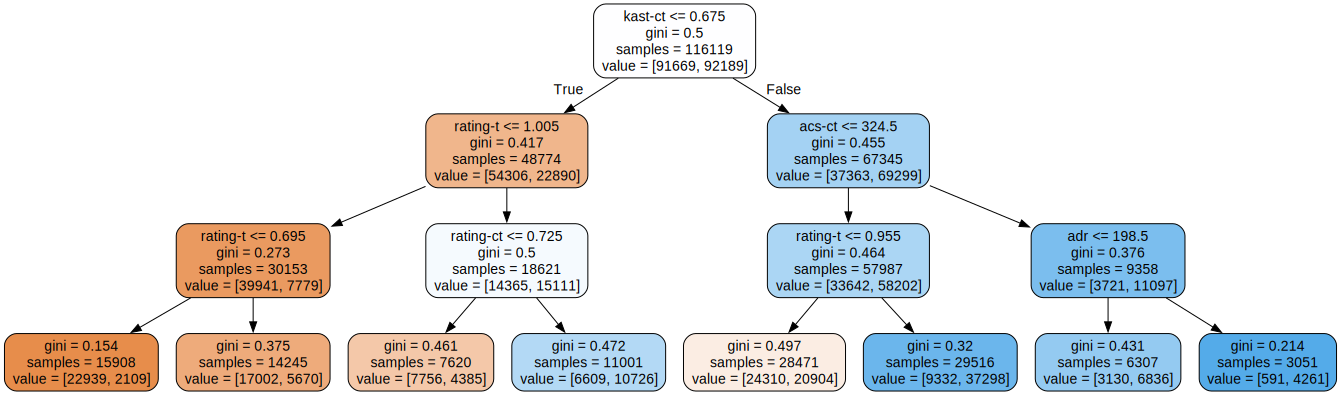

In [101]:
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG

graph = Source(export_graphviz(clf.estimators_[0], out_file=None, feature_names=X.columns, filled=True, rounded=True))
SVG(graph.pipe(format='svg'))

results

In [71]:
%%perl -eat # skip cell

from sklearn.model_selection import cross_val_score

c = cross_val_score(clf, X, y, cv=5)
print('Cross Validation Accuracy:', c)

Couldn't find program: 'perl'


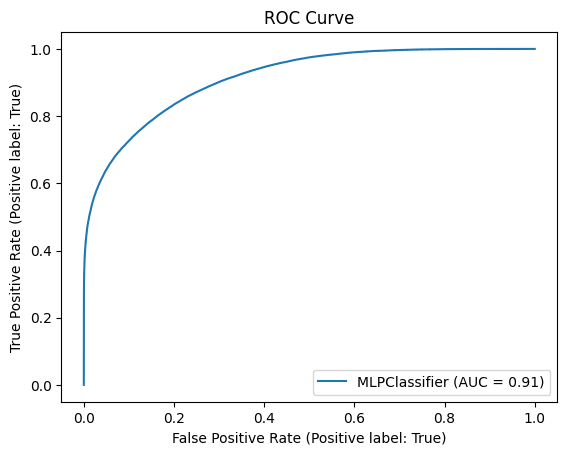

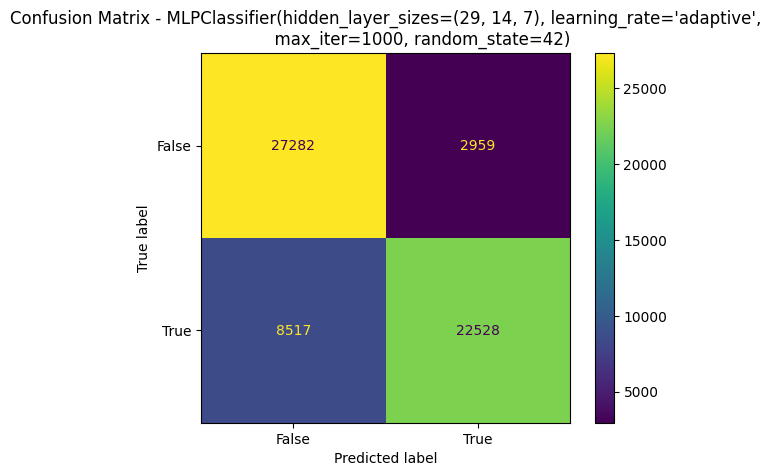

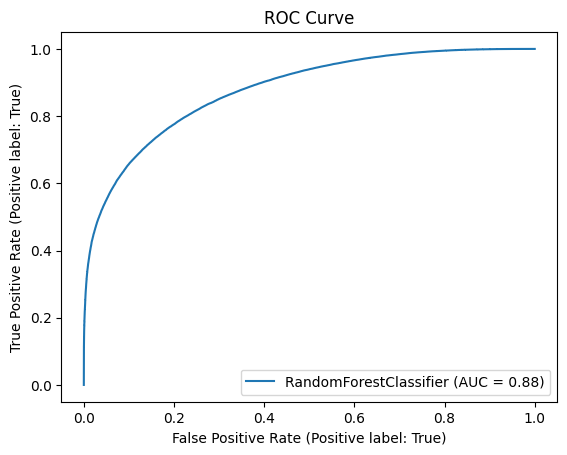

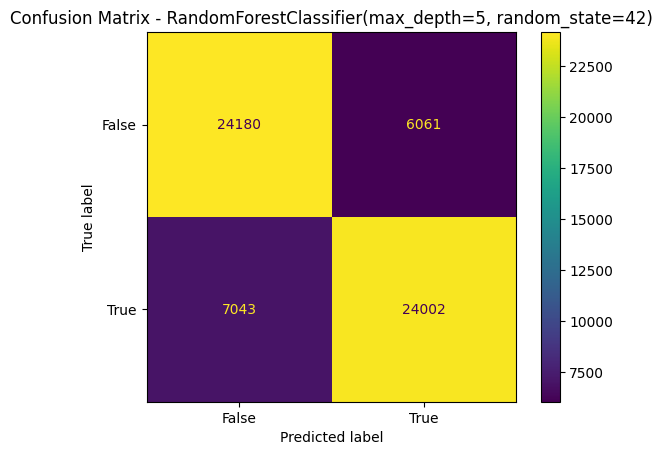

In [91]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay

for m in models.keys():
    clf = models.get(m)
    RocCurveDisplay.from_estimator(clf, X, y)
    plt.title('ROC Curve')
    plt.show()

    predictions = clf.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    plt.title('Confusion Matrix - {}'.format(clf))
    plt.show()